In [1]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## CHART-EVENTS DATA

In [2]:
chart24 = pd.read_csv('./chart24.csv')

#EXTRACT FEATURES AND LABELS
Y24 = chart24['aki_flag'] 
X24 = chart24.iloc[:,2:] 

#FILL MISSING WITH MEAN IMPUTATION
X24 = X24.fillna(X24.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
scaler = MinMaxScaler()
X24 = scaler.fit_transform(X24)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [3]:
chart48 = pd.read_csv('./chart48.csv')

Y48 = chart48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = chart48.iloc[:,2:]  #features

#FILL MISSING WITH MEAN IMPUTATION
X48 = X48.fillna(X48.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
X48 = scaler.fit_transform(X48)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [4]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'learning_rate':[0.1,0.05,0.01,1,0.5,0.25, 0.75], 'max_depth' :[1,2,3,4,5], 'n_estimators':[100,250,500]}
]  

In [5]:
gs24 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(GradientBoostingClassifier(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [6]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.700 total time=  19.1s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.705 total time=  17.7s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.707 total time=  21.1s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.711 total time=  21.7s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.707 total time=  22.7s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.702 total time=  54.1s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.711 total time= 1.2min
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.707 total time= 1.1min
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.714 total time=  51.6s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.705 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.711 total time= 1.0min
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.707 total time= 1.0min
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.713 total time=  57.6s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.705 total time=  58.4s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.705 total time=  22.4s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.706 total time=  22.6s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.708 total time=  22.2s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.712 total time=  22.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.708 total time=  21.8s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.706 total time=  52.0s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.706 total time=  51.2s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.707 total time=  51.8s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.706 total time=  51.3s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.706 total time= 1.5min
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.707 total time= 1.4min
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.708 total time= 1.4min
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.710 total time= 1.4min
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.708 total time= 1.4min
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.705 total time=  24.4s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=  23.6s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.653 total time=  22.9s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.656 total time=  53.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.648 total time=  52.9s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.648 total time=  56.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.636 total time=  55.3s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.641 total time=  53.3s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.643 total time= 1.7min
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.650 total time= 1.7min
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.650 total time= 1.7min
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.639 total time= 1.8min
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.682 total time=  25.9s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.671 total time=  25.8s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.678 total time=  25.8s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.669 total time= 1.1min
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.675 total time= 1.1min
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.670 total time= 1.1min
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.664 total time= 1.1min
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.657 total time= 1.1min
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.663 total time= 2.2min
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.665 total time= 2.2min
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.678 total time= 2.3min
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.674 total time= 2.3min
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.695 total time=  34.4s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.680 total time=  35.1s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.700 total time=  35.1s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.689 total time=  35.6s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.677 total time=  35.4s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.675 total time= 1.4min
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.673 total time= 1.4min
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.689 total time= 1.4min
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.646 total time= 1.4min
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.669 total time= 2.7min
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.667 total time= 2.7min
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.683 total time= 2.7min
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.669 total time= 2.7min
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.665 total time= 2.8min


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [7]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 250}
The best estimator found for the 24h DCW:
GradientBoostingClassifier(learning_rate=0.25, max_depth=1, n_estimators=250)


In [8]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.765 total time=   4.2s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.765 total time=   4.1s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.763 total time=   4.0s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.760 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.763 total time=   4.0s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.763 total time=  10.3s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.765 total time=   9.9s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.760 total time=   9.9s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.760 total time=   9.9s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=250;, score=0.761 total 

[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.765 total time=  19.6s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.761 total time=  19.5s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.760 total time=  19.5s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500;, score=0.761 total time=  19.6s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.765 total time=   7.3s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.764 total time=   7.3s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.762 total time=   7.3s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.763 total time=   7.3s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=100;, score=0.761 total time=   7.3s
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=250;, score=0.757 total time=  18.4s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.763 total time=  18.3s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.763 total time=  18.3s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=250;, score=0.762 total time=  18.4s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.765 total time=  36.5s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.765 total time=  36.5s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.762 total time=  36.4s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.763 total time=  36.7s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=500;, score=0.760 total time=  36.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.764 total time=  10.9s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.765 total time=  10.9s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.705 total time=  10.8s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.693 total time=  26.9s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.690 total time=  26.9s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.673 total time=  26.9s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.703 total time=  26.9s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=250;, score=0.706 total time=  26.9s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.698 total time=  53.8s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.693 total time=  54.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.685 total time=  53.7s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.705 total time=  54.0s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.

[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.718 total time=  14.3s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.722 total time=  14.4s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=100;, score=0.723 total time=  14.3s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.706 total time=  35.7s
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.712 total time=  35.8s
[CV 3/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.715 total time=  35.8s
[CV 4/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.700 total time=  36.4s
[CV 5/5] END learning_rate=0.5, max_depth=4, n_estimators=250;, score=0.711 total time=  35.8s
[CV 1/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.738 total time= 1.2min
[CV 2/5] END learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.705 total time= 1.2min
[CV 3/5] END learning_rate=0.5, max_depth=4, n_est

[CV 4/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.739 total time= 1.2min
[CV 5/5] END learning_rate=0.25, max_depth=4, n_estimators=500;, score=0.726 total time= 1.2min
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.738 total time=  18.0s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.738 total time=  17.9s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.743 total time=  17.9s
[CV 4/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.727 total time=  17.9s
[CV 5/5] END learning_rate=0.25, max_depth=5, n_estimators=100;, score=0.745 total time=  18.0s
[CV 1/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.730 total time=  44.9s
[CV 2/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.724 total time=  44.9s
[CV 3/5] END learning_rate=0.25, max_depth=5, n_estimators=250;, score=0.725 total time=  44.8s
[CV 4/5] END learning_rate=0.25, max_dep

[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=250;, score=0.721 total time=  43.4s
[CV 1/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.718 total time= 1.4min
[CV 2/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.711 total time= 1.4min
[CV 3/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.728 total time= 1.4min
[CV 4/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.727 total time= 1.4min
[CV 5/5] END learning_rate=0.75, max_depth=5, n_estimators=500;, score=0.740 total time= 1.4min


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.01, 1, 0.5, 0.25,
                                            0.75],
                          'max_depth': [1, 2, 3, 4, 5],
                          'n_estimators': [100, 250, 500]}],
             verbose=3)

In [9]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
The best estimator found for the 48h DCW:
GradientBoostingClassifier(learning_rate=0.01)


In [5]:
best24 = GradientBoostingClassifier(learning_rate=0.25, max_depth=1, n_estimators=250)
best48 = GradientBoostingClassifier(learning_rate=0.01, max_depth= 3, n_estimators = 100)

In [12]:
#y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5, verbose = 3)

In [13]:
#y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5, verbose = 3)

In [14]:
#CLASSIFICATION REPORT 24H
#print(classification_report(Y24, y_pred24))

In [15]:
#CLASSIFICATION REPORT 48H
#print(classification_report(Y48, y_pred48))

Elapsed time to compute the importances: 0.080 seconds


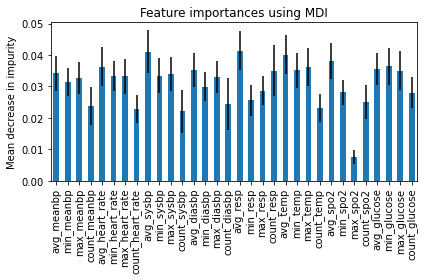

In [16]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=chart24.columns[2:])

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [17]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03420
Feature: 1, Score: 0.03156
Feature: 2, Score: 0.03269
Feature: 3, Score: 0.02370
Feature: 4, Score: 0.03623
Feature: 5, Score: 0.03328
Feature: 6, Score: 0.03321
Feature: 7, Score: 0.02286
Feature: 8, Score: 0.04111
Feature: 9, Score: 0.03343
Feature: 10, Score: 0.03396
Feature: 11, Score: 0.02209
Feature: 12, Score: 0.03525
Feature: 13, Score: 0.02994
Feature: 14, Score: 0.03309
Feature: 15, Score: 0.02440
Feature: 16, Score: 0.04136
Feature: 17, Score: 0.02557
Feature: 18, Score: 0.02872
Feature: 19, Score: 0.03497
Feature: 20, Score: 0.04016
Feature: 21, Score: 0.03511
Feature: 22, Score: 0.03612
Feature: 23, Score: 0.02308
Feature: 24, Score: 0.03813
Feature: 25, Score: 0.02817
Feature: 26, Score: 0.00761
Feature: 27, Score: 0.02499
Feature: 28, Score: 0.03551
Feature: 29, Score: 0.03646
Feature: 30, Score: 0.03503
Feature: 31, Score: 0.02802


Elapsed time to compute the importances: 0.054 seconds


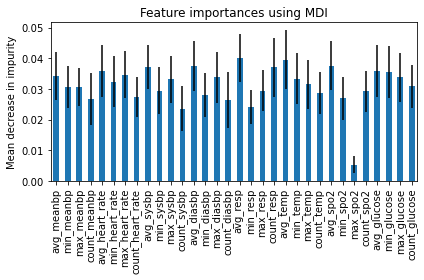

In [18]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index=chart48.columns[2:])

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [19]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03416
Feature: 1, Score: 0.03065
Feature: 2, Score: 0.03061
Feature: 3, Score: 0.02672
Feature: 4, Score: 0.03590
Feature: 5, Score: 0.03239
Feature: 6, Score: 0.03464
Feature: 7, Score: 0.02732
Feature: 8, Score: 0.03725
Feature: 9, Score: 0.02942
Feature: 10, Score: 0.03315
Feature: 11, Score: 0.02357
Feature: 12, Score: 0.03744
Feature: 13, Score: 0.02805
Feature: 14, Score: 0.03377
Feature: 15, Score: 0.02632
Feature: 16, Score: 0.04002
Feature: 17, Score: 0.02408
Feature: 18, Score: 0.02944
Feature: 19, Score: 0.03699
Feature: 20, Score: 0.03955
Feature: 21, Score: 0.03334
Feature: 22, Score: 0.03150
Feature: 23, Score: 0.02856
Feature: 24, Score: 0.03763
Feature: 25, Score: 0.02697
Feature: 26, Score: 0.00529
Feature: 27, Score: 0.02922
Feature: 28, Score: 0.03591
Feature: 29, Score: 0.03538
Feature: 30, Score: 0.03381
Feature: 31, Score: 0.03092


### Apply the cross_validate( ) function now:

In [6]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [7]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [9]:
scores24['test_accuracy'].mean()

0.6424541906225005

In [10]:
scores24['test_precision'].mean()

0.40582773094440727

In [11]:
scores24['test_recall'].mean()

0.4494528919962842

In [12]:
scores24['test_f1'].mean()

0.4264802878471734

In [13]:
scores24['test_roc_auc'].mean()

0.631043169237563

In [8]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [14]:
scores48['test_accuracy'].mean()

0.5690662564361385

In [15]:
scores48['test_precision'].mean()

0.2899233255472365

In [16]:
scores48['test_recall'].mean()

0.5801151761517616

In [17]:
scores48['test_f1'].mean()

0.3862310883193207

In [18]:
scores48['test_roc_auc'].mean()

0.601631320415429